# LTSM Stock Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Collect Data

In [2]:
now = datetime.now()

ticker = 'NVDA'
start = datetime(now.year-10, now.month, now.day)
end = now

df = yf.download(ticker, start, end)
df

C:\Users\lperaza\AppData\Local\Temp\ipykernel_27712\3238502520.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-08-19,0.558727,0.566504,0.552651,0.560185,249248000
2015-08-20,0.538555,0.555081,0.535882,0.552408,426932000
2015-08-21,0.521786,0.543659,0.521300,0.534667,382664000
2015-08-24,0.503316,0.530535,0.486061,0.492622,682284000
2015-08-25,0.492865,0.527376,0.492865,0.525431,622684000
...,...,...,...,...,...
2025-08-12,183.160004,184.479996,179.460007,182.960007,145485700
2025-08-13,181.589996,183.970001,179.350006,182.619995,179871700


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-08-19,0.558727,0.566504,0.552651,0.560185,249248000
2015-08-20,0.538555,0.555081,0.535882,0.552408,426932000
2015-08-21,0.521786,0.543659,0.521300,0.534667,382664000
2015-08-24,0.503316,0.530535,0.486061,0.492622,682284000
2015-08-25,0.492865,0.527376,0.492865,0.525431,622684000


---------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Data Exploration & Visualization

In [4]:
df.dtypes

Price   Ticker
Close   NVDA      float64
High    NVDA      float64
Low     NVDA      float64
Open    NVDA      float64
Volume  NVDA        int64
dtype: object

In [5]:
df.shape

(2514, 5)

In [6]:
df.isna().sum()

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,29.231345,29.744170,28.658515,29.225522,4.644119e+08
std,42.558497,43.268553,41.762317,42.569889,2.545827e+08
min,0.492865,0.527376,0.486061,0.492622,5.244800e+07
25%,4.081705,4.140995,4.038897,4.100422,2.999430e+08
50%,11.446126,11.702409,11.230642,11.498474,4.136370e+08
75%,27.646912,28.092002,27.103772,27.620762,5.636780e+08
max,183.160004,184.479996,180.589996,182.960007,3.692928e+09


In [8]:
df = df.reset_index()

In [9]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2015-08-19,0.558727,0.566504,0.552651,0.560185,249248000
1,2015-08-20,0.538555,0.555081,0.535882,0.552408,426932000
2,2015-08-21,0.521786,0.543659,0.521300,0.534667,382664000
3,2015-08-24,0.503316,0.530535,0.486061,0.492622,682284000
4,2015-08-25,0.492865,0.527376,0.492865,0.525431,622684000


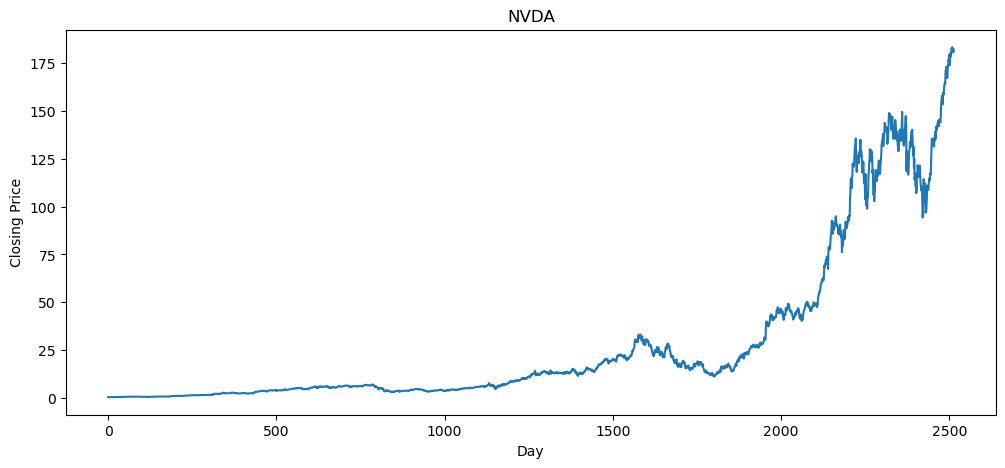

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Day');
plt.ylabel('Closing Price');

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Feature Engineering

Moving Average Concept

10, 20, 30, 40, 50, 60, 70, 80, 90, 100

Moving Average of 5 days ==> 
  1    2    3    4    5    6    7    8    9    10
null null null null  30   40   50   60   70    80

In [11]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[3:8])/5)

60.0


In [12]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [13]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average NVIDIA

In [14]:
df['MA_100'] = df.Close.rolling(100).mean()
df.tail()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,
2509,2025-08-12,183.160004,184.479996,179.460007,182.960007,145485700,138.610079
2510,2025-08-13,181.589996,183.970001,179.350006,182.619995,179871700,139.240762
2511,2025-08-14,182.020004,183.020004,179.460007,179.750000,129554000,139.884044
2512,2025-08-15,180.449997,181.899994,178.039993,181.880005,156602200,140.474528
2513,2025-08-18,182.009995,182.940002,180.589996,180.600006,131744700,141.087812


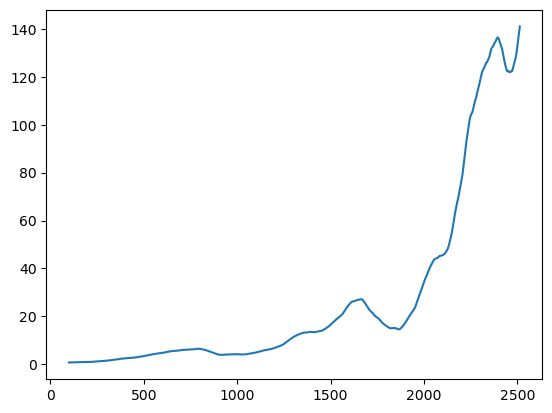

In [15]:
plt.plot(df.MA_100);

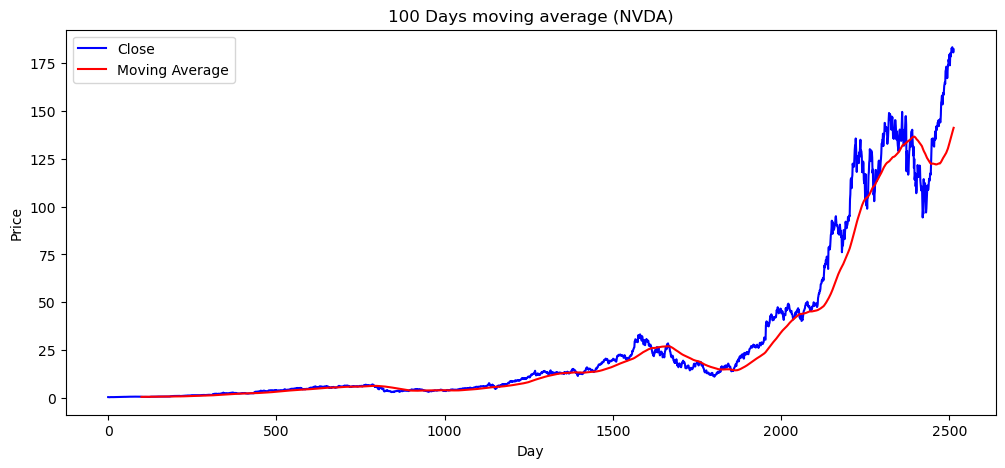

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close, 'b', label = 'Close' );
plt.plot(df.MA_100, 'r', label = 'Moving Average');
plt.legend()
plt.title(f'100 Days moving average ({ticker})');
plt.xlabel('Day');
plt.ylabel('Price');

### 200 days Moving Average NVIDIA

In [17]:
df['MA_200'] = df.Close.rolling(200).mean()
df.tail()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,,
2509,2025-08-12,183.160004,184.479996,179.460007,182.960007,145485700,138.610079,136.244244
2510,2025-08-13,181.589996,183.970001,179.350006,182.619995,179871700,139.240762,136.454554
2511,2025-08-14,182.020004,183.020004,179.460007,179.750000,129554000,139.884044,136.662766
2512,2025-08-15,180.449997,181.899994,178.039993,181.880005,156602200,140.474528,136.857479
2513,2025-08-18,182.009995,182.940002,180.589996,180.600006,131744700,141.087812,137.065091


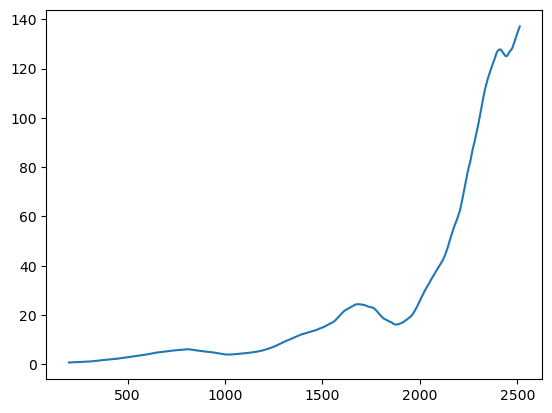

In [18]:
plt.plot(df.MA_200);

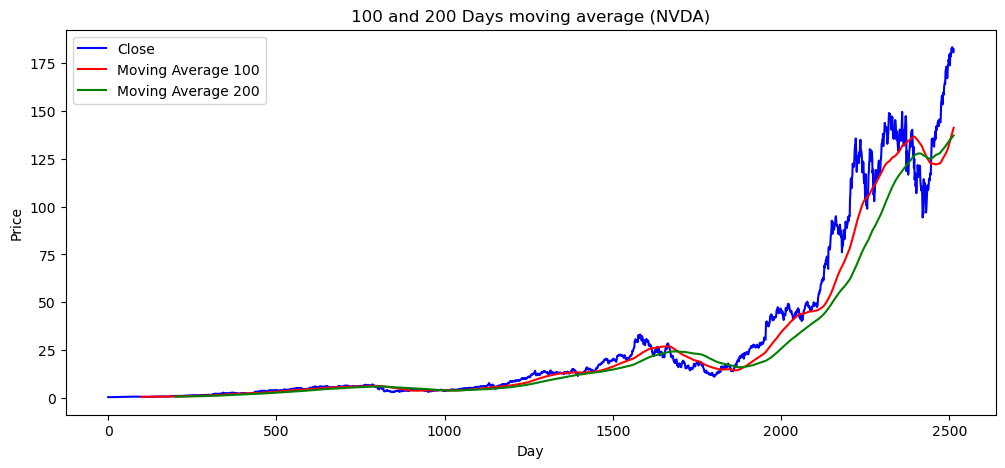

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close, 'b', label = 'Close' );
plt.plot(df.MA_100, 'r', label = 'Moving Average 100');
plt.plot(df.MA_200, 'g', label = 'Moving Average 200');
plt.legend()
plt.title(f'100 and 200 Days moving average ({ticker})');
plt.xlabel('Day');
plt.ylabel('Price');

In [20]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,,
0,2015-08-19,0.558727,0.566504,0.552651,0.560185,249248000,NaN,NaN
1,2015-08-20,0.538555,0.555081,0.535882,0.552408,426932000,NaN,NaN
2,2015-08-21,0.521786,0.543659,0.521300,0.534667,382664000,NaN,NaN
3,2015-08-24,0.503316,0.530535,0.486061,0.492622,682284000,NaN,NaN
4,2015-08-25,0.492865,0.527376,0.492865,0.525431,622684000,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-08-12,183.160004,184.479996,179.460007,182.960007,145485700,138.610079,136.244244
2510,2025-08-13,181.589996,183.970001,179.350006,182.619995,179871700,139.240762,136.454554
2511,2025-08-14,182.020004,183.020004,179.460007,179.750000,129554000,139.884044,136.662766


### Calculate % Change in each day

In [21]:
df['Pct_change'] = df.Close.pct_change()
df[['Close', 'Pct_change']]

Price,Close,Pct_change
Ticker,NVDA,
0,0.558727,NaN
1,0.538555,-0.036103
2,0.521786,-0.031137
3,0.503316,-0.035398
4,0.492865,-0.020763
...,...,...
2509,183.160004,0.006042
2510,181.589996,-0.008572
2511,182.020004,0.002368


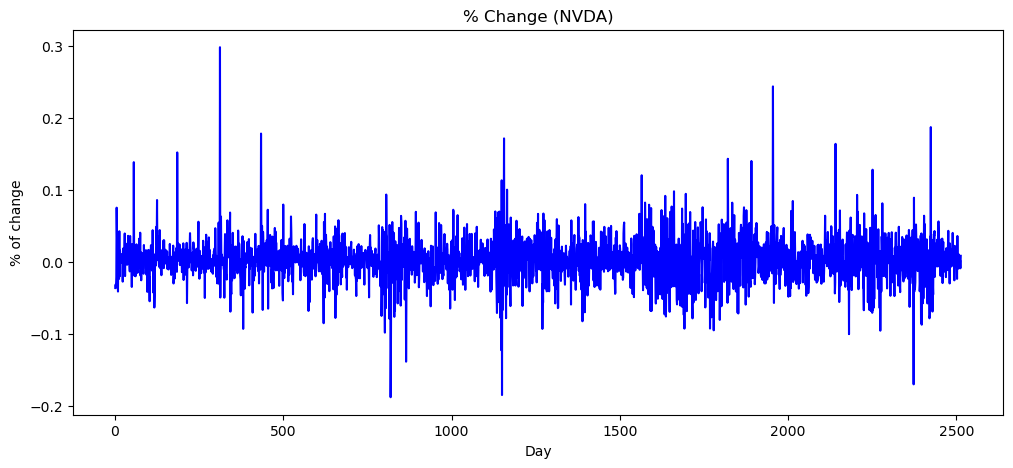

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df.Pct_change, 'b', label = 'Close' );
plt.title(f'% Change ({ticker})');
plt.xlabel('Day');
plt.ylabel('% of change');

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Data Preprocessing

In [23]:
df.shape

(2514, 9)

In [24]:
# Split data Train - Test

In [25]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print('Data Training')
print(data_training)
print('Data Testing')
print(data_testing)

Data Training
Ticker       NVDA
0        0.558727
1        0.538555
2        0.521786
3        0.503316
4        0.492865
...           ...
1754    17.767372
1755    17.061394
1756    18.070932
1757    17.916155
1758    18.682053

[1759 rows x 1 columns]
Data Testing
Ticker        NVDA
1759     19.004589
1760     18.851805
1761     18.308588
1762     18.745962
1763     17.823294
...            ...
2509    183.160004
2510    181.589996
2511    182.020004
2512    180.449997
2513    182.009995

[755 rows x 1 columns]


#### Scaling Data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)

In [28]:
data_training_array

array([[0.00200686],
       [0.0013922 ],
       [0.00088124],
       ...,
       [0.53561854],
       [0.53090233],
       [0.55423988]], shape=(1759, 1))

In [29]:
type(data_training_array)

numpy.ndarray

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 5. Sequence Creation

Sequence creation explanation

1st it

x-train
12, 13, 12, 15, 10, 14, 16, 18, 19, 20
y-train 
21

2nd it

x-train
13, 12, 15, 10, 14, 16, 18, 19, 20, 21
y-train 
20 

3rd it
x-train
12, 15, 10, 14, 16, 18, 19, 20, 21, 20
y-train 
23

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train

array([[[2.00685527e-03],
        [1.39220468e-03],
        [8.81241163e-04],
        ...,
        [7.49048859e-03],
        [7.00731117e-03],
        [7.04448523e-03]],

       [[1.39220468e-03],
        [8.81241163e-04],
        [3.18432291e-04],
        ...,
        [7.00731117e-03],
        [7.04448523e-03],
        [7.41615681e-03]],

       [[8.81241163e-04],
        [3.18432291e-04],
        [0.00000000e+00],
        ...,
        [7.04448523e-03],
        [7.41615681e-03],
        [6.73228161e-03]],

       ...,

       [[7.38376625e-01],
        [7.89696035e-01],
        [7.98244282e-01],
        ...,
        [5.62759479e-01],
        [5.26368799e-01],
        [5.04857042e-01]],

       [[7.89696035e-01],
        [7.98244282e-01],
        [7.91856010e-01],
        ...,
        [5.26368799e-01],
        [5.04857042e-01],
        [5.35618536e-01]],

       [[7.98244282e-01],
        [7.91856010e-01],
        [7.64781729e-01],
        ...,
        [5.04857042e-01],
        [5.3561

In [32]:
x_train.ndim

3

In [33]:
y_train.ndim

1

In [34]:
x_train.shape

(1659, 100, 1)

In [35]:
y_train.shape

(1659,)

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 6. Model Building

In [36]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [38]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 7. Model Training

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0096
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.5546e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 7.1654e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.9126e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 6.1514e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.7981e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 4.8968e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.8045e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 4.9608e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.1843e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.4120e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.1273e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.0306e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.0379e-04
Epoch 15/50
52/52 ━

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

#### Save Trained Model

In [42]:
model.save('stock_prediction_model.keras')

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 8. Prepare Test Data

In [44]:
data_training.tail(100)

Ticker,NVDA
1659,26.480200
1660,25.591669
1661,28.103508
1662,27.646271
1663,28.172396
...,...
1754,17.767372
1755,17.061394
1756,18.070932
1757,17.916155


In [43]:
data_testing

Ticker,NVDA
1759,19.004589
1760,18.851805
1761,18.308588
1762,18.745962
1763,17.823294
...,...
2509,183.160004
2510,181.589996
2511,182.020004
2512,180.449997


In [45]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,NVDA
1659,26.480200
1660,25.591669
1661,28.103508
1662,27.646271
1663,28.172396
...,...
1754,17.767372
1755,17.061394
1756,18.070932
1757,17.916155


In [47]:
final_test_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_test_df

Ticker,NVDA
0,26.480200
1,25.591669
2,28.103508
3,27.646271
4,28.172396
...,...
850,183.160004
851,181.589996
852,182.020004
853,180.449997


In [48]:
input_data = scaler.fit_transform(final_test_df)
input_data

array([[0.088784  ],
       [0.08361649],
       [0.09822481],
       [0.09556561],
       [0.09862544],
       [0.10116276],
       [0.09555399],
       [0.09320827],
       [0.08987554],
       [0.09363796],
       [0.0853409 ],
       [0.07649231],
       [0.07533687],
       [0.06901393],
       [0.0620349 ],
       [0.05963695],
       [0.06369547],
       [0.05820863],
       [0.06125689],
       [0.06366644],
       [0.05950922],
       [0.05196699],
       [0.04808846],
       [0.05033547],
       [0.04386737],
       [0.04170166],
       [0.04963871],
       [0.04246808],
       [0.048193  ],
       [0.04859359],
       [0.05284371],
       [0.04419252],
       [0.04321126],
       [0.03319562],
       [0.03694061],
       [0.03133764],
       [0.0286958 ],
       [0.03758508],
       [0.03501875],
       [0.0403198 ],
       [0.03312593],
       [0.03420589],
       [0.03170925],
       [0.0328937 ],
       [0.02857389],
       [0.03334078],
       [0.03842697],
       [0.044

In [49]:
input_data.shape

(855, 1)

In [52]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [53]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [54]:
x_test

array([[[0.088784  ],
        [0.08361649],
        [0.09822481],
        ...,
        [0.03987751],
        [0.03897735],
        [0.04343165]],

       [[0.08361649],
        [0.09822481],
        [0.09556561],
        ...,
        [0.03897735],
        [0.04343165],
        [0.04530745]],

       [[0.09822481],
        [0.09556561],
        [0.09862544],
        ...,
        [0.04343165],
        [0.04530745],
        [0.04441889]],

       ...,

       [[0.61925117],
        [0.64082627],
        [0.6366392 ],
        ...,
        [0.9936026 ],
        [1.        ],
        [0.99086918]],

       [[0.64082627],
        [0.6366392 ],
        [0.59633861],
        ...,
        [1.        ],
        [0.99086918],
        [0.99337001]],

       [[0.6366392 ],
        [0.59633861],
        [0.58278875],
        ...,
        [0.99086918],
        [0.99337001],
        [0.98423918]]], shape=(755, 100, 1))

In [55]:
x_test.shape

(755, 100, 1)

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 9. Make predictions

In [56]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [57]:
y_predicted

array([[0.04024681],
       [0.0423166 ],
       [0.04346834],
       [0.04295475],
       [0.0431081 ],
       [0.04155477],
       [0.03859923],
       [0.03665846],
       [0.03569946],
       [0.03662846],
       [0.03448275],
       [0.03152511],
       [0.02877064],
       [0.02629355],
       [0.02254391],
       [0.01923841],
       [0.01680524],
       [0.01584965],
       [0.01605602],
       [0.01718605],
       [0.01835222],
       [0.01654818],
       [0.01463582],
       [0.01295083],
       [0.01236064],
       [0.0125492 ],
       [0.01246349],
       [0.01248547],
       [0.01121872],
       [0.00997593],
       [0.00861108],
       [0.00799841],
       [0.00834897],
       [0.00785418],
       [0.00716435],
       [0.00732998],
       [0.00883562],
       [0.01022835],
       [0.01097484],
       [0.00936865],
       [0.00699464],
       [0.00507232],
       [0.00373347],
       [0.00381115],
       [0.00286666],
       [0.00318684],
       [0.00384458],
       [0.004

In [58]:
y_test

array([0.04530745, 0.04441889, 0.04125966, 0.04380333, 0.03843729,
       0.03370424, 0.03455793, 0.03479604, 0.03880894, 0.0292093 ,
       0.02654369, 0.02460985, 0.02243786, 0.0157187 , 0.01403454,
       0.0129776 , 0.01444731, 0.01605062, 0.01835686, 0.01904234,
       0.01106058, 0.01104316, 0.00988714, 0.0114498 , 0.01251868,
       0.01132199, 0.01181577, 0.00774938, 0.00748796, 0.00581494,
       0.00688963, 0.00876597, 0.00576847, 0.00529793, 0.00746475,
       0.01126971, 0.0115137 , 0.01105478, 0.00493195, 0.00257344,
       0.00208548, 0.00158588, 0.00425808, 0.        , 0.00383983,
       0.00429876, 0.00478672, 0.00561742, 0.00719751, 0.00797012,
       0.01181577, 0.00969544, 0.01132199, 0.0151444 , 0.01318673,
       0.01345396, 0.01157179, 0.01274524, 0.01701495, 0.01785727,
       0.01960582, 0.01480747, 0.0262747 , 0.02962658, 0.02944071,
       0.03159589, 0.02720416, 0.02585064, 0.02429379, 0.02375935,
       0.02794775, 0.03074195, 0.02929548, 0.026722  , 0.02562

In [59]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()

In [60]:
y_predicted

array([ 18.134432 ,  18.490324 ,  18.688362 ,  18.600052 ,  18.62642  ,
        18.359331 ,  17.851137 ,  17.517431 ,  17.352535 ,  17.512274 ,
        17.143326 ,  16.634773 ,  16.161152 ,  15.735228 ,  15.090491 ,
        14.522126 ,  14.103752 ,  13.939443 ,  13.974927 ,  14.169232 ,
        14.369749 ,  14.059551 ,  13.730728 ,  13.441002 ,  13.33952  ,
        13.371944 ,  13.357205 ,  13.360986 ,  13.143173 ,  12.9294815,
        12.6948   ,  12.589455 ,  12.649733 ,  12.564655 ,  12.446041 ,
        12.474521 ,  12.733409 ,  12.972884 ,  13.101239 ,  12.825061 ,
        12.416862 ,  12.086326 ,  11.856115 ,  11.869472 ,  11.707071 ,
        11.762125 ,  11.87522  ,  11.989754 ,  12.110319 ,  12.27658  ,
        12.439337 ,  12.755384 ,  12.88672  ,  13.018576 ,  13.315751 ,
        13.445604 ,  13.507613 ,  13.430562 ,  13.412031 ,  13.649074 ,
        13.914718 ,  14.19586  ,  14.122044 ,  14.626311 ,  15.284681 ,
        15.746625 ,  16.128359 ,  16.114426 ,  15.940845 ,  15.7

In [61]:
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [62]:
y_test

array([ 19.00458908,  18.85180473,  18.30858803,  18.74596214,
        17.82329369,  17.00946426,  17.15625381,  17.19719505,
        17.88719749,  16.23657799,  15.7782383 ,  15.44572163,
        15.072258  ,  13.91692543,  13.62734222,  13.44560528,
        13.69831562,  13.97399902,  14.37054634,  14.48841286,
        13.11598206,  13.11298656,  12.91421318,  13.18290615,
        13.3666954 ,  13.16093063,  13.2458334 ,  12.54663467,
        12.50168419,  12.21401501,  12.39880371,  12.72143269,
        12.20602512,  12.1251173 ,  12.49769306,  13.1519413 ,
        13.19389343,  13.11498451,  12.0621891 ,  11.65665245,
        11.57275105,  11.48684692,  11.94631958,  11.21416092,
        11.87440395,  11.95331478,  12.03721714,  12.18005371,
        12.45174313,  12.58458996,  13.2458334 ,  12.88125229,
        13.16093063,  13.81817818,  13.48156357,  13.52751255,
        13.20388126,  13.40565109,  14.13981056,  14.28464413,
        14.58530045,  13.76024437,  15.73198605,  16.30

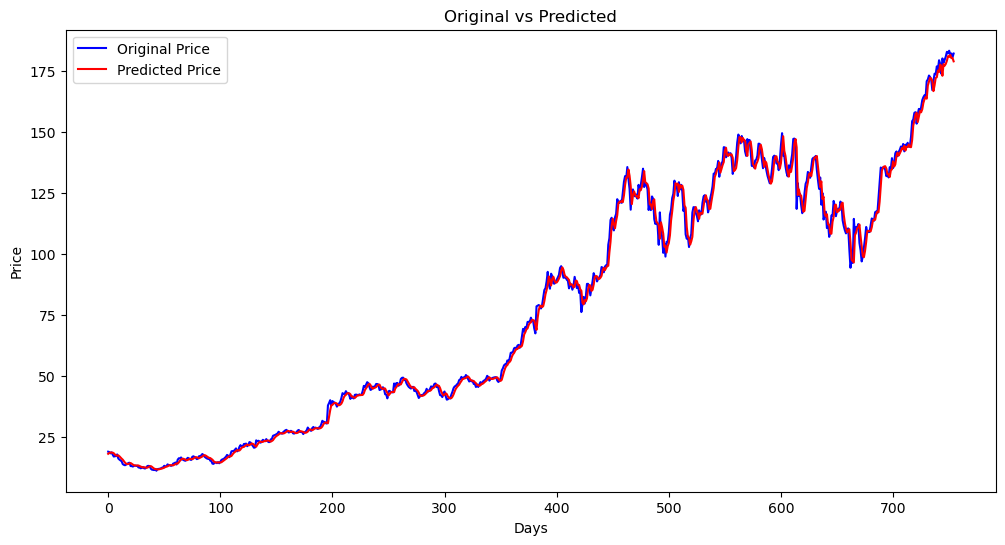

In [63]:
plt.figure(figsize=(12,6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.title('Original vs Predicted');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();

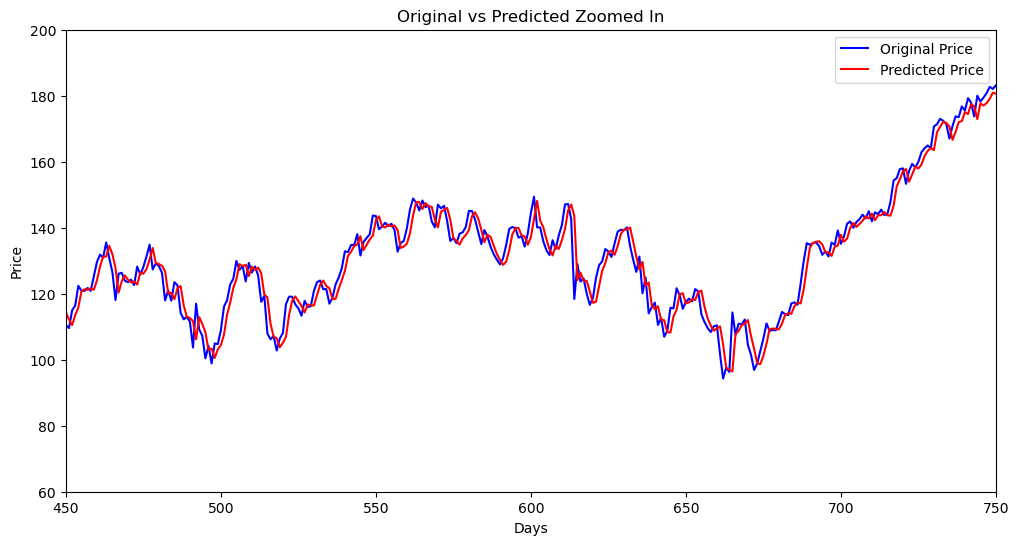

In [67]:
plt.figure(figsize=(12,6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.title('Original vs Predicted Zoomed In');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.xlim(450, 750);
plt.ylim(60, 200);

---------------------------------------------------------------------------------------------------------------------------------------------------------

## 10. Model Evaluation

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

#### Mean Squared Error (MSE)

In [70]:
mse = mean_squared_error(y_test, y_predicted)
print('--------------------------')
print(f'Mean Squared Error: {mse}')
print('--------------------------')

--------------------------
Mean Squared Error: 9.304471200842581
--------------------------


#### Root Mean Squared Error (MSE)

In [71]:
rmse = np.sqrt(mse)
print('--------------------------')
print(f'Root Mean Squared Error: {rmse}')
print('--------------------------')

--------------------------
Root Mean Squared Error: 3.0503231305621674
--------------------------


#### R-Squared

In [ ]:
r2 = r2_score(